In [1]:
from selenium import webdriver
from lxml import etree
import pandas as pd

In [34]:
driver = webdriver.Edge()

In [35]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36 Edg/114.0.1823.37'
}

In [36]:
url = 'https://sou.zhaopin.com/'
driver.get(url)

In [67]:
# 爬取后端开发相关岗位总共1200条

# 爬取后端开发（苏州）相关的岗位600条
for i in range(1, 21):
    url = 'https://sou.zhaopin.com/?jl=639&kw=%E5%90%8E%E7%AB%AF%E5%BC%80%E5%8F%91&p={}'.format(i)
    driver.get(url)
    print('正在爬取第{}页的数据'.format(i))
    dom = etree.HTML(driver.page_source)
    companyName = dom.xpath('//div[@class="iteminfo__line1__compname"]//span[@classA="iteminfo__line1__compname__name"]/@title')
    positionName = dom.xpath('//div[@class="iteminfo__line1__jobname"]//span[@class="iteminfo__line1__jobname__name"]/@title')
    positionWorkCity = dom.xpath('//ul[@class="iteminfo__line2__jobdesc__demand"]/li[1]/text()')
    salary = dom.xpath('//div[@class="iteminfo__line2__jobdesc"]/p/text()')

    data = pd.DataFrame()
    data['公司名'] = companyName
    data['职位名'] = positionName
    data['工作地点'] = positionWorkCity
    data['薪资'] = salary
    try:
        data.to_csv('jobInfo.csv', mode='a+', header=None, encoding='UTF8')
    except:
        print('爬取失败')

正在爬取第1页的数据
正在爬取第2页的数据
正在爬取第3页的数据
正在爬取第4页的数据
正在爬取第5页的数据
正在爬取第6页的数据
正在爬取第7页的数据
正在爬取第8页的数据
正在爬取第9页的数据
正在爬取第10页的数据
正在爬取第11页的数据
正在爬取第12页的数据
正在爬取第13页的数据
正在爬取第14页的数据
正在爬取第15页的数据
正在爬取第16页的数据
正在爬取第17页的数据
正在爬取第18页的数据
正在爬取第19页的数据
正在爬取第20页的数据


In [ ]:
# 爬取后端开发（上海）相关的岗位600条
for i in range(1, 21):
    url = 'https://sou.zhaopin.com/?jl=538&kw=%E5%90%8E%E7%AB%AF%E5%BC%80%E5%8F%91&p={}'.format(i)
    driver.get(url)
    print('正在爬取第{}页的数据'.format(i))
    dom = etree.HTML(driver.page_source)
    companyName = dom.xpath('//div[@class="iteminfo__line1__compname"]//span[@class="iteminfo__line1__compname__name"]/@title')
    positionName = dom.xpath('//div[@class="iteminfo__line1__jobname"]//span[@class="iteminfo__line1__jobname__name"]/@title')
    positionWorkCity = dom.xpath('//ul[@class="iteminfo__line2__jobdesc__demand"]/li[1]/text()')
    salary = dom.xpath('//div[@class="iteminfo__line2__jobdesc"]/p/text()')

    data = pd.DataFrame()
    data['公司名'] = companyName
    data['职位名'] = positionName
    data['工作地点'] = positionWorkCity
    data['薪资'] = salary
    try:
        data.to_csv('jobInfo.csv', mode='a+', header=None, encoding='UTF8')
    except:
        print('爬取失败')

In [2]:
import pandas as pd
import numpy as np
import re
import jieba

In [3]:
data = pd.read_csv('jobInfo.csv', encoding='UTF8', header=None, index_col=0)
data.index = range(len(data))
data.columns = ['公司名','职位名','工作地点','薪资']
data.drop_duplicates(subset=['公司名','职位名'], inplace=True)

In [4]:
# 数据处理与加工
data.info()

# 数据去重
data.duplicated().sum()
data.drop_duplicates(inplace=True)

# 缺失值处理
data.isnull().sum()
data[data.isnull().T.any()]
data.fillna('待补充', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   公司名     1132 non-null   object
 1   职位名     1132 non-null   object
 2   工作地点    1132 non-null   object
 3   薪资      1132 non-null   object
dtypes: object(4)
memory usage: 44.2+ KB


In [10]:
import tkinter as tk
from wordcloud import WordCloud

# 词云
# 1 加载自定义词典
jieba.load_userdict('hitWords')
jieba.add_word('全栈')
# 2 中文分词
data_cut = data['职位名'].apply(jieba.lcut)
data_cut

0                                 [后端, 开发, 程序员]
1                                 [后端, 开发, 工程师]
2                                      [后端, 开发]
3                              [golang, 后端, 开发]
4                                 [后端, 开发, 工程师]
                         ...                   
1194                                [Java, 工程师]
1195                     [高级, java, 工程师, -, SH]
1197                        [高级, Java, 开发, 工程师]
1198    [高级, java, 开发, 工程师, （, 驻场, +, 不, 加班, ）]
1199                [Java, 开发, （, 银行, +, 双休, ）]
Name: 职位名, Length: 1132, dtype: object

D:\anaconda3\lib\site-packages\wordcloud\wordcloud.py:1000: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


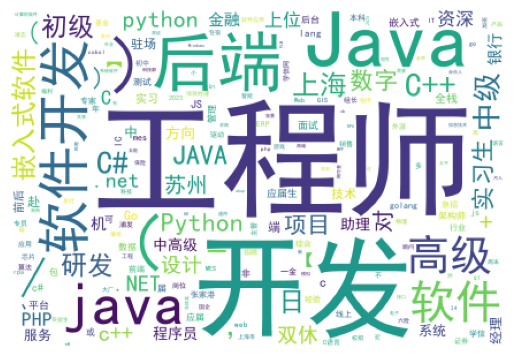

In [11]:
import matplotlib.pyplot as plt
# 3 统计词频
num = pd.Series(tk._flatten(list(data_cut))).value_counts()

# 4 绘制词云
# 读取背景图片
pic = plt.imread('img.png')
# 词云参数设置
wc = WordCloud(mask=pic, background_color='white', font_path='C:/Windows/Fonts/simhei.TTF')
wc.fit_words(num)

# 展示词云
plt.imshow(wc)
plt.axis('off')
plt.show()

In [12]:
# 数据预处理

# 职位名数据处理
# 1、职位名探索
# 将名称转为小写，确保不同名称相同意思的字段分类时可以算做同一类
data['职位名'] = data['职位名'].str.strip().astype(str).apply(lambda x: x.lower())
data['职位名'].value_counts()

# 2、职位筛选出待分析职位数据
# 目标职位
targetJob = ['.net', 'c\#', 'c\+\+',
            'golang', 'java',
            'php', 'python',
            '嵌入式']
# 布尔索引筛选
index = [data['职位名'].str.count(i) for i in targetJob]
index = np.array(index).sum(axis=0) > 0
jobInfo = data[index]

# 3、将职位名称标准化
jobList = ['.net', 'c#', 'c++',
            'golang', 'java',
            'php', 'python',
            '嵌入式']

jobList = np.array(jobList)


def rename(x=None, name_list=jobList):
    index = [i in x for i in name_list]
    if sum(index) > 0:
        return name_list[index][0]
    else:
        return x


jobInfo['职位名'] = jobInfo['职位名'].apply(rename)
jobInfo['职位名'].value_counts()

C:\Users\cjl\AppData\Local\Temp\ipykernel_13612\2586951054.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobInfo['职位名'] = jobInfo['职位名'].apply(rename)


java      504
c++        65
c#         49
.net       38
嵌入式        34
python     30
php        18
golang     13
Name: 职位名, dtype: int64

In [6]:
# 薪资数据处理
# 提取最高和最低工资 单位k/月
# 筛选出薪资数据
jobInfo['薪资'].str[-1].value_counts()
index = jobInfo['薪资'].str[-1].apply(lambda x: x in ['万', '千'])
jobInfo = jobInfo[index]

def get_salary_range(salary_str):
    pattern = r'(\d+\.?\d*)(万|千)?-(\d+\.?\d*)(万|千)?'
    match = re.match(pattern, salary_str)
    if match:
        # 获取数字和单位
        num1, unit1, num2, unit2 = match.groups()
        # 将单位转换成对应的数字
        if unit1 == '万':
            num1 = float(num1) * 10000
        elif unit1 == '千':
            num1 = float(num1) * 1000
        if unit2 == '万':
            num2 = float(num2) * 10000
        elif unit2 == '千':
            num2 = float(num2) * 1000
        # 计算最低薪资和最高薪资
        min_salary = int(num1)
        max_salary = int(num2)
        return min_salary, max_salary
    else:
        return None


salary = jobInfo['薪资'].apply(get_salary_range)
jobInfo['最低薪资'] = salary.apply(lambda x: x[0])
jobInfo['最高薪资'] = salary.apply(lambda x: x[1])
jobInfo['薪资水平'] = jobInfo[['最低薪资', '最高薪资']].mean(axis=1)

jobInfo

,公司名,职位名,工作地点,薪资,最低薪资,最高薪资,薪资水平
3,苏州爱启网络科技有限公司,golang,苏州-吴江,6千-1.2万,6000,12000,9000.0
6,慧码科技(苏州)有限公司,java,苏州-虎丘,4千-6千,4000,6000,5000.0
7,苏州启荣信息科技有限公司,c#,苏州,6千-1.2万,6000,12000,9000.0
8,深圳市讯方技术股份有限公司,golang,苏州-虎丘,8千-1.3万,8000,13000,10500.0
9,江苏明岱信息科技有限公司,java,苏州,7千-1.4万,7000,14000,10500.0
...,...,...,...,...,...,...,...
1194,上海汉升软件有限公司,java,上海-徐汇,1.2万-1.8万,12000,18000,15000.0
1195,上海倍通医药科技咨询有限公司,java,上海-黄浦,1.8万-2.8万,18000,28000,23000.0
1197,上海云瀚科技股份有限公司,java,上海-徐汇,1.8万-3万,18000,30000,24000.0
1198,上海锐赢,java,上海-浦东,1.5万-1.8万,15000,18000,16500.0


In [7]:
# 工作地点处理(按区名)

addressList = ['上海-嘉定','上海-奉贤','上海-宝山','上海-徐汇','上海-普陀',
               '上海-杨浦','上海-松江','上海-浦东','上海-虹口','上海-长宁',
               '上海-闵行','上海-青浦','上海-静安','上海-黄浦',
               '苏州-吴中','苏州-太仓','苏州-姑苏','苏州-工业园区',
               '苏州-常熟','苏州-张家港','苏州-昆山','苏州-相城',
               '苏州-虎丘','苏州-高新区','上海','苏州']
address_list = np.array(addressList)

def rename(x=None, name_list=address_list):
    index = [i in x for i in name_list]
    if sum(index) > 0:
        return name_list[index][0]
    else:
        return x


jobInfo['工作地点'] = jobInfo['工作地点'].apply(rename)
jobInfo['工作地点'].value_counts()

上海-浦东      173
苏州-虎丘      109
苏州-吴中      101
苏州          58
上海-徐汇       41
上海          34
苏州-姑苏       21
苏州-昆山       21
上海-黄浦       21
上海-闵行       19
上海-静安       16
上海-杨浦       13
上海-宝山       12
上海-虹口       11
上海-长宁       10
苏州-相城       10
苏州-常熟        9
苏州-张家港       8
上海-嘉定        8
上海-青浦        7
苏州-太仓        6
上海-普陀        6
苏州-工业园区      5
上海-松江        3
苏州-高新区       2
上海-奉贤        1
Name: 工作地点, dtype: int64

In [8]:
# 构建新数据
features = ['公司名', '职位名', '工作地点', '薪资水平']
data_new = jobInfo[features]   # 清洗干净后的数据
data_new.to_csv('job_info_new.csv', encoding='UTF8', index=None)

data_new.groupby('职位名').agg({'职位名': 'count'}).rename(columns={'职位名': '数量'}).sort_values('数量')
data_new['职位名'].value_counts()

java      482
c++        64
c#         48
.net       37
嵌入式        34
python     29
php        18
golang     13
Name: 职位名, dtype: int64

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
job_info_new = pd.read_csv('job_info_new.csv', encoding='UTF8')

D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23884 (\N{CJK UNIFIED IDEOGRAPH-5D4C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


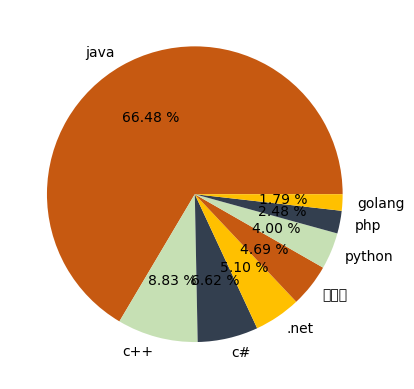

In [15]:
# 热门岗位 饼图
num = job_info_new['职位名'].value_counts()
plt.pie(num, labels=num.index, autopct='%.2f %%',
        colors=['#C65911', '#C6E0B4', '#333F4F', '#FFC000'])
plt.show()

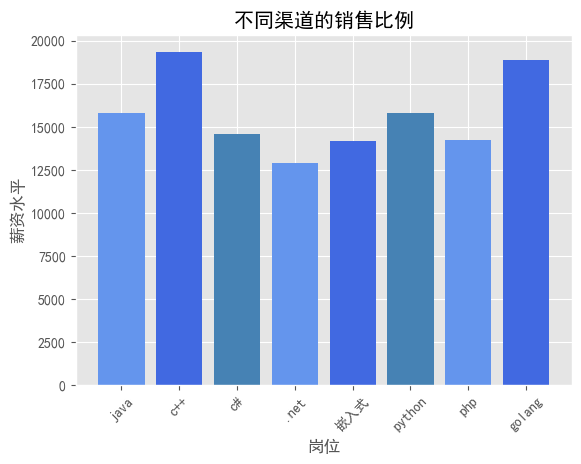

In [106]:
# 热门岗位的薪资待遇 柱状图
a = job_info_new.groupby('职位名').agg({'薪资水平': 'mean', '公司名': 'count'}).sort_values('公司名', ascending=False)
b = a['薪资水平'][:10]
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.subplots_adjust(bottom=0.15)
plt.bar(b.index, b, color=['cornflowerblue', 'royalblue', 'steelblue'])
plt.xticks(rotation=45)
plt.xlabel('岗位')
plt.ylabel('薪资水平')
plt.title('不同渠道的销售比例')
plt.show()

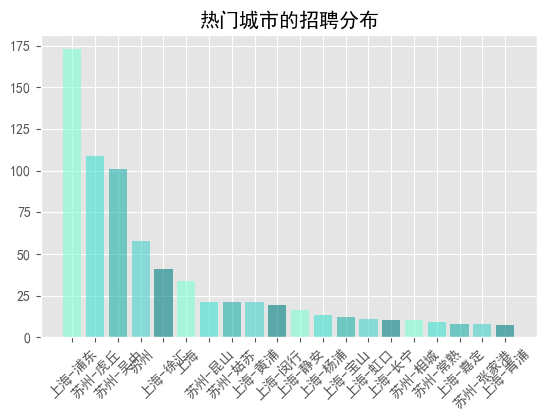

In [105]:
# 热门城市的招聘分布
a = job_info_new.groupby('工作地点').agg({'薪资水平': 'mean', '公司名': 'count'}).sort_values('公司名', ascending=False)
b = a['公司名'][:20]
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.subplots_adjust(bottom=0.25)
plt.bar(b.index, b, color=['aquamarine','turquoise','lightseagreen','mediumturquoise','teal'],alpha=0.6)
plt.xticks(rotation=45)
plt.title('热门城市的招聘分布')
plt.show()

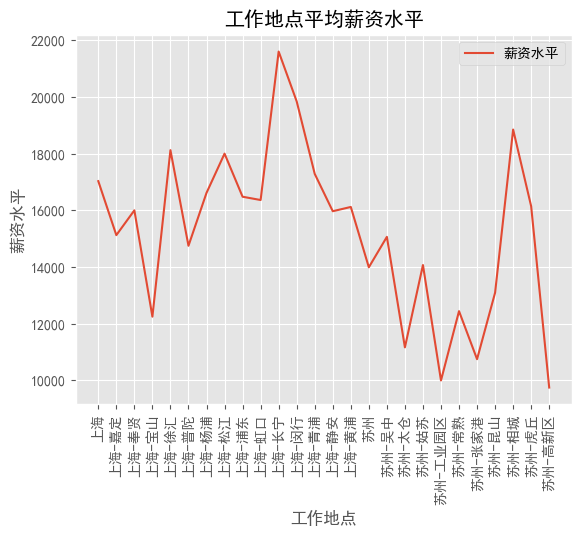

In [100]:
# 折线图
# 按工作地点分组，计算平均薪资水平
grouped = jobInfo.groupby('工作地点')['薪资水平'].mean()

# 绘制折线图
plt.plot(grouped.index, grouped.values)
plt.xticks(rotation=90)
# 设置图表标题和坐标轴标签
plt.title('工作地点平均薪资水平')
plt.legend(['薪资水平'])
plt.xlabel('工作地点')
plt.ylabel('薪资水平')

# 显示图表
plt.show()